🩺 Diabetes Prediction Analysis
Dataset

Source:
<!-- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset -->

1️⃣ Data Loading & Initial Exploration
Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Load Dataset

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")


Preview Data

In [3]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Data Types

In [4]:
df.dtypes


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Summary Statistics

In [5]:
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Check Missing Values

In [6]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

2️⃣ Descriptive Analysis (NumPy, Pandas, Seaborn)

Average Values of Key Indicators

In [7]:
avg_bmi = df['bmi'].mean()
avg_hypertension = df['hypertension'].mean()
avg_glucose = df['blood_glucose_level'].mean()
avg_hba1c = df['HbA1c_level'].mean()

avg_bmi, avg_hypertension, avg_glucose, avg_hba1c


(27.3207671, 0.07485, 138.05806, 5.527507)

Correlation Matrix

In [8]:
health_vars = df[['bmi', 'hypertension', 'blood_glucose_level', 'HbA1c_level', 'diabetes']]
corr_matrix = health_vars.corr()
corr_matrix


,bmi,hypertension,blood_glucose_level,HbA1c_level,diabetes
bmi,1.000000,0.147666,0.091261,0.082997,0.214357
hypertension,0.147666,1.000000,0.084429,0.080939,0.197823
blood_glucose_level,0.091261,0.084429,1.000000,0.166733,0.419558
HbA1c_level,0.082997,0.080939,0.166733,1.000000,0.400660
diabetes,0.214357,0.197823,0.419558,0.400660,1.000000


Interpretation:

Strong positive correlation between HbA1c and blood glucose

Diabetes is highly correlated with HbA1c and glucose

<h4>Grouped Analysis by Diabetes Status</h4>

In [9]:
group_means = df.groupby('diabetes')[['bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']].mean()
group_means


,bmi,blood_glucose_level,HbA1c_level,hypertension
diabetes,,,,
0,26.887163,132.852470,5.396761,0.058984
1,31.988382,194.094706,6.934953,0.245647


Visualizations (Seaborn)

Histogram – BMI Distribution

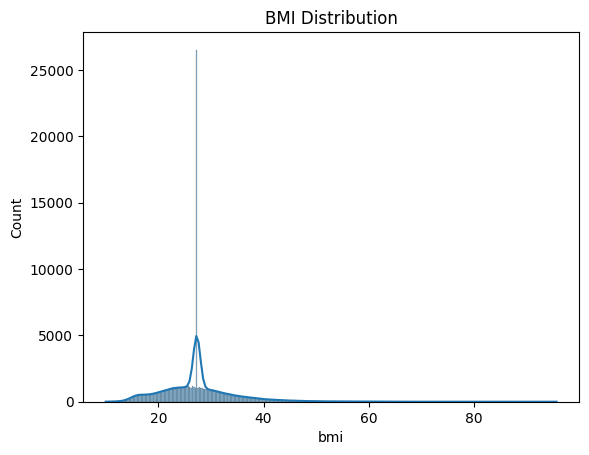

In [10]:
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.show()


Boxplot – Glucose by Diabetes Status

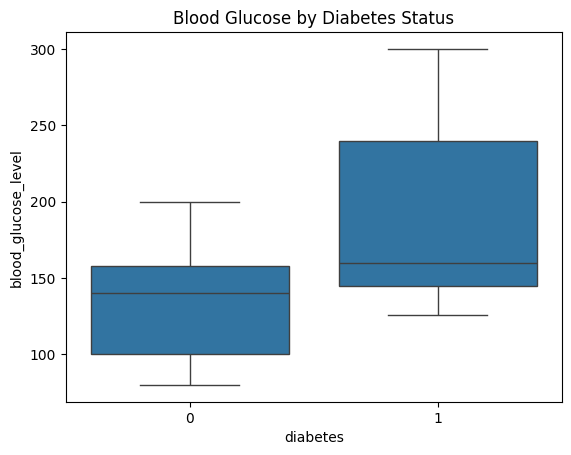

In [11]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title("Blood Glucose by Diabetes Status")
plt.show()


Scatter Plot – HbA1c vs Blood Glucose

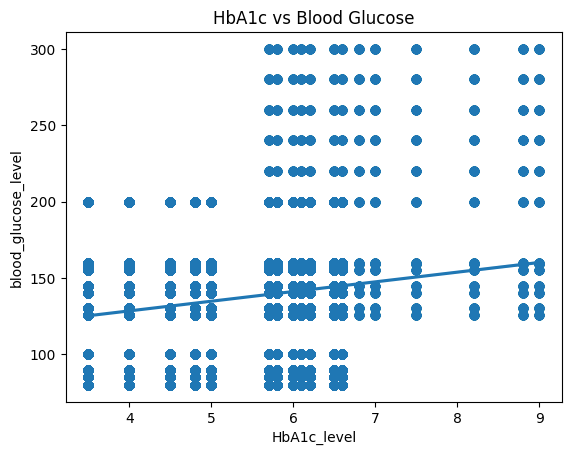

In [12]:
sns.regplot(x='HbA1c_level', y='blood_glucose_level', data=df)
plt.title("HbA1c vs Blood Glucose")
plt.show()


Heatmap – Correlation Matrix

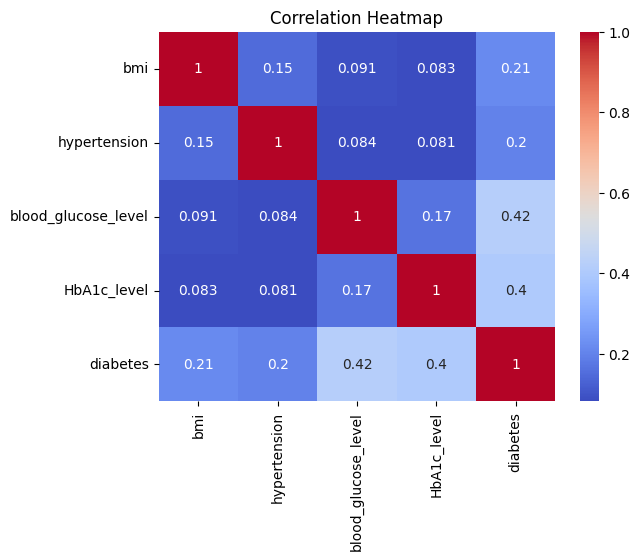

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


3️⃣ Hypothesis Testing

✅ Z-Test (One-Sample)

Claim: Average BMI = 25

H₀: μ = 25

H₁: μ ≠ 25

In [14]:
sample_mean = df['bmi'].mean()
population_mean = 25
std_dev = df['bmi'].std()
n = len(df)

z_score = (sample_mean - population_mean) / (std_dev / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

z_score, p_value


(110.57931974055543, 0.0)

📌 Conclusion:
If p-value < 0.05, reject H₀ → average BMI is significantly different from 25.

<h4>T-Test (Independent Two-Sample)</h4>

Question: Is average age different between diabetic and non-diabetic groups?

In [15]:
age_diabetic = df[df['diabetes'] == 1]['age']
age_nondiabetic = df[df['diabetes'] == 0]['age']

t_stat, p_val = stats.ttest_ind(age_diabetic, age_nondiabetic)

t_stat, p_val


(84.44765154890852, 0.0)

📌 Conclusion:
A low p-value indicates a significant age difference between groups.

<h4>Chi-Square Test</h4>

Question: Is Smoking History related to Diabetes Status?

In [16]:
contingency_table = pd.crosstab(df['smoking_history'], df['diabetes'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

chi2, p


(1956.0944200848764, 0.0)

📌 Conclusion:
If p < 0.05, smoking history is significantly associated with diabetes.

<h4>4️⃣ Summary & Insights</h4>
🔍 Key Findings

Diabetic patients have significantly higher HbA1c and blood glucose levels.

BMI is higher on average among diabetic individuals.

HbA1c and blood glucose show strong positive correlation, making them strong predictors.

Z-test showed that the population BMI is significantly different from 25.

T-test confirmed that diabetic individuals are generally older.

Chi-Square test indicated a significant relationship between smoking history and diabetes.

These insights can help healthcare professionals focus on early screening and lifestyle interventions.

<h4>✅ Final Deliverables</h4>

✔ Cleaned dataset

✔ Visualizations

✔ Statistical tests

✔ Interpretations & insights